# Example 4 - Learning Rate

In [2]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline


### $$g(x) = x^4 - 4x^2 + 5$$

In [3]:
# Make Some Data

x_2 = np.linspace(-2, 2, 100)

def g(x):
    return x**4 - 4*x**2 +5

def dg(x):
    return 4*x**3 - 8*x 

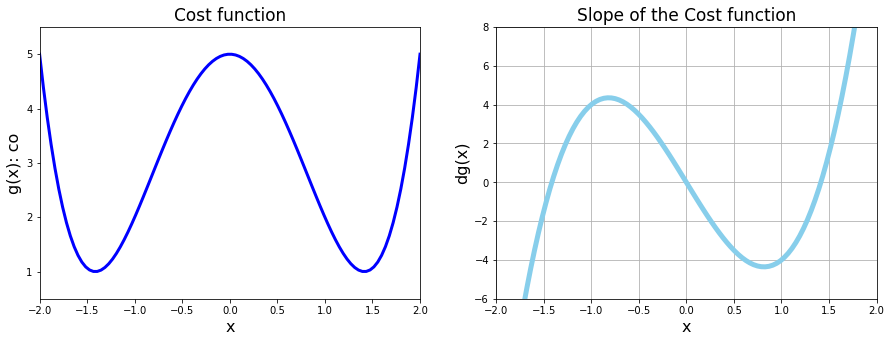

In [4]:
# Plot derivatives side by side
plt.figure(figsize=[15, 5])

# 1st Chart: Cost function
plt.subplot(1, 2, 1)

plt.title("Cost function", fontsize=17)
plt.xlabel("x", fontsize=16)
plt.ylabel("g(x): co", fontsize=16)
plt.plot(x_2, g(x_2), color="blue", linewidth=3)
plt.xlim([-2, 2])
plt.ylim([0.5, 5.5])

# 2nd Chart: Derivative function
plt.subplot(1, 2, 2)

plt.title("Slope of the Cost function", fontsize=17)
plt.xlabel("x", fontsize=16)
plt.ylabel("dg(x)", fontsize=16)
plt.plot(x_2, dg(x_2), color="skyblue", linewidth=5)
plt.xlim([-2, 2])
plt.ylim([-6, 8])
plt.grid()


plt.show()

## Gradient Descent as a Python function

In [8]:
def gradient_descent(derivative_func, initial_guess, multiplier=0.02, precision=0.001, max_interation=300):
    
    new_x = initial_guess
    x_list = [new_x]
    slope_list = [derivative_func(new_x)]

    for n in range(max_interation):
        previous_x = new_x
        gradient = derivative_func(previous_x)
        new_x = previous_x - multiplier * gradient

        x_list.append(new_x)
        slope_list.append(derivative_func(new_x))

        step_size = abs(new_x - previous_x)
        if step_size < precision:
            break
    return new_x, x_list, slope_list

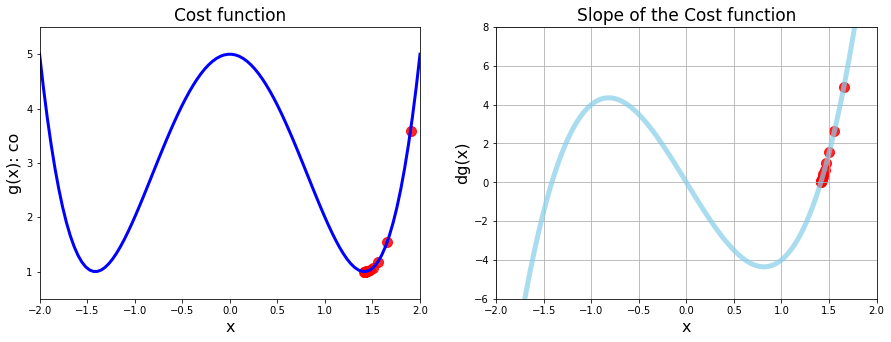

number os stpes: 14


In [12]:
local_min, list_x, deri_list = gradient_descent(
    derivative_func=dg,
    initial_guess=1.9,
    multiplier=0.02,
    max_interation=500
)

# Derivative and Scatter plot side by side
plt.figure(figsize=[15, 5])

# 1st Chart: Cost function
plt.subplot(1, 2, 1)

plt.title("Cost function", fontsize=17)
plt.xlabel("x", fontsize=16)
plt.ylabel("g(x): co", fontsize=16)
plt.plot(x_2, g(x_2), color="blue", linewidth=3)
plt.xlim([-2, 2])
plt.ylim([0.5, 5.5])

plt.scatter(list_x, g(np.array(list_x)), color='red', s=100, alpha=0.85)

# 2nd Chart: Derivative function
plt.subplot(1, 2, 2)

plt.title("Slope of the Cost function", fontsize=17)
plt.xlabel("x", fontsize=16)
plt.ylabel("dg(x)", fontsize=16)
plt.plot(x_2, dg(x_2), color="skyblue", linewidth=5, alpha=0.7)
plt.xlim([-2, 2])
plt.ylim([-6, 8])
plt.grid()

plt.scatter(list_x, deri_list, color='red', s=100, alpha=0.85)

plt.show()

print("number os stpes:", len(list_x))

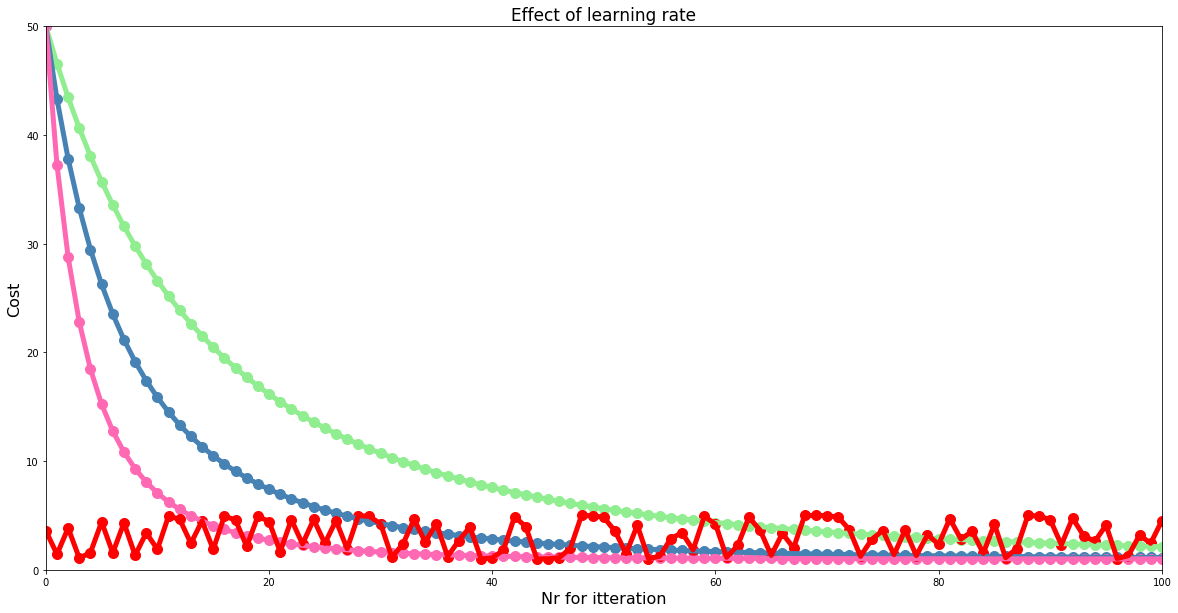

In [28]:
# Run Gradient descent 3 times
n = 100
low_gamma = gradient_descent(
    derivative_func=dg,
    initial_guess=3,
    multiplier=0.0005,
    precision=0.0001,
    max_interation=n
)

mid_gamma = gradient_descent(
    derivative_func=dg,
    initial_guess=3,
    multiplier=0.001,
    precision=0.0001,
    max_interation=n
)

high_gamma = gradient_descent(
    derivative_func=dg,
    initial_guess=3,
    multiplier=0.002,
    precision=0.0001,
    max_interation=n
)

insane_gamma = gradient_descent(
    derivative_func=dg,
    initial_guess=1.9,
    multiplier=0.25,
    precision=0.0001,
    max_interation=n
)


# Plotting reduction in cost for each iteration
plt.figure(figsize=[20, 10])

plt.title("Effect of learning rate", fontsize=17)
plt.xlabel("Nr for itteration", fontsize=16)
plt.ylabel("Cost", fontsize=16)
plt.xlim([0, n])
plt.ylim([0, 50])

# Value for our charts
# 1) Y Axis Data: convert the list to numpy array 
low_values = np.array(low_gamma[1])

# 2) X Axis Data: create a list of 0 to n+1
itteration_list = list(range(0, n+1))

# Plotting low learning rate
plt.plot(itteration_list, g(low_values), color="lightgreen", linewidth=5)
plt.scatter(itteration_list, g(low_values), color='lightgreen', s=100)


# Plotting mid learning rate
plt.plot(itteration_list, g(np.array(mid_gamma[1])), color="steelblue", linewidth=5)
plt.scatter(itteration_list, g(np.array(mid_gamma[1])), color='steelblue', s=100)


# Plotting high learning rate
plt.plot(itteration_list, g(np.array(high_gamma[1])), color="hotpink", linewidth=5)
plt.scatter(itteration_list, g(np.array(high_gamma[1])), color='hotpink', s=100)


# Plotting insane learning rate
plt.plot(itteration_list, g(np.array(insane_gamma[1])), color="red", linewidth=5)
plt.scatter(itteration_list, g(np.array(insane_gamma[1])), color='red', s=100)


plt.show()